| Data name| In master function |  All years dataframe
| -------- | -------- |  -------- | 
|Schüler/-innen je Lehrkraft | teachers_yyyy| teachers_concat
|Anzahl an Lehrkräften | students_per_teacher_yyyy| students_per_teacher_concat
|Anzahl an Schülern | students_yyyy| students_concat
|Unterichtsstd. Je Schüler	| hours_per_student_yyyy|hours_per_student_concat
|Ausgaben 	| ausgaben_yyyy|ausgaben_concat

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
#pd.set_option('display.max_rows', None)

from master import hours_per_student_concat, exams_concat, students_per_teacher_concat

#### Filter students with special needs hours for further analysis

In [111]:
hours_per_student_concat.head(3)

,SchoolType,Baden-Wüttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Deutschland,Year
0,Allgemeinbildende Schulen,1.713945,1.585794,1.754554,1.770079,1.714481,1.690766,1.648265,1.788607,1.566029,1.523436,1.617019,1.699214,1.782667,1.856108,1.524647,1.830527,1.626870,2011
1,Förderschulen,5.322422,3.174173,3.976845,4.241515,4.702265,3.895806,4.469091,3.223718,3.733670,4.037930,4.060919,4.326110,3.722410,3.548922,4.031242,3.720916,4.039715,2011
2,Sekundarstufe I,1.573263,1.560799,1.795453,1.787801,1.664775,1.611509,1.533235,1.830719,1.482593,1.438379,1.466960,1.545581,1.751113,1.772398,1.472075,1.822960,1.549745,2011


In [112]:
# Filter by school types
school_type = ['Förderschulen']
special_hours_per_student = hours_per_student_concat[hours_per_student_concat['SchoolType'].isin(school_type)]
special_hours_per_student

,SchoolType,Baden-Wüttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Deutschland,Year
1,Förderschulen,5.322422,3.174173,3.976845,4.241515,4.702265,3.895806,4.469091,3.223718,3.733670,4.037930,4.060919,4.326110,3.722410,3.548922,4.031242,3.720916,4.039715,2011
5,Förderschulen,5.403411,3.247547,3.910765,4.310855,5.251629,4.061269,4.130790,3.229463,3.792095,4.149017,4.060364,4.292946,3.693002,3.573094,4.222747,3.696530,4.082579,2012
9,Förderschulen,5.509200,3.330991,4.089878,4.295465,5.886000,3.977055,4.526066,3.393113,3.849093,4.152384,4.080063,4.250489,3.816398,3.637269,4.245348,3.750099,4.169521,2013
13,Förderschulen,5.496278,3.356062,3.927277,4.359644,6.342965,4.096228,4.807204,3.363989,3.844003,4.185383,4.105652,4.357730,3.767681,3.637913,4.416723,3.763306,4.204423,2014
17,Förderschulen,5.629201,3.389615,4.121900,4.297695,6.583203,4.170557,4.523093,3.487731,3.912489,4.137084,4.140623,4.625786,3.767511,3.568022,4.601667,3.727839,4.205533,2015
21,Förderschulen,5.651185,3.422438,4.267716,4.369909,5.199752,4.110346,4.767283,3.466344,4.054035,3.892462,4.040352,4.805001,3.715976,3.581100,4.541393,3.735268,4.180780,2016
25,Förderschulen,5.547186,3.421052,4.119126,4.447173,5.229203,4.059840,5.006281,3.489530,4.026877,4.103997,4.199318,4.624623,3.709076,3.521768,4.742420,3.648323,4.230849,2017
29,Förderschulen,5.448255,3.399417,4.045916,4.510069,5.413639,3.610898,5.225442,3.476326,4.042271,4.080739,4.205459,4.643807,3.684263,3.502869,4.838085,3.562452,4.213147,2018
33,Förderschulen,5.318552,3.439908,4.090233,4.567786,5.547321,4.338998,4.977495,3.472815,4.070773,4.155313,4.176079,4.544993,3.623095,3.435096,4.965702,3.502491,4.211274,2019
37,Förderschulen,5.316331,3.441905,4.007190,4.562530,6.617706,4.293876,5.352202,3.698889,4.058323,4.036489,4.203956,4.883348,3.457903,3.380769,5.075562,3.406339,4.204639,2020


In [113]:
avg_special_hours_student = special_hours_per_student.groupby('Year').sum().mean().reset_index()
avg_special_hours_student.rename(columns={'index':'Federal States',
                                        0: 'avg_special_hours_student'}, inplace=True)

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_68856/787732475.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [114]:
avg_special_hours_student

,Federal States,avg_special_hours_student
0,Baden-Wüttemberg,5.450747
1,Bayern,3.369571
2,Berlin,4.042850
3,Brandenburg,4.412567
4,Bremen,5.782701
5,Hamburg,4.091844
6,Hessen,4.851309
7,Mecklenburg-Vorpommern,3.429090
8,Niedersachsen,3.943006
9,Nordrhein-Westfalen,4.093849


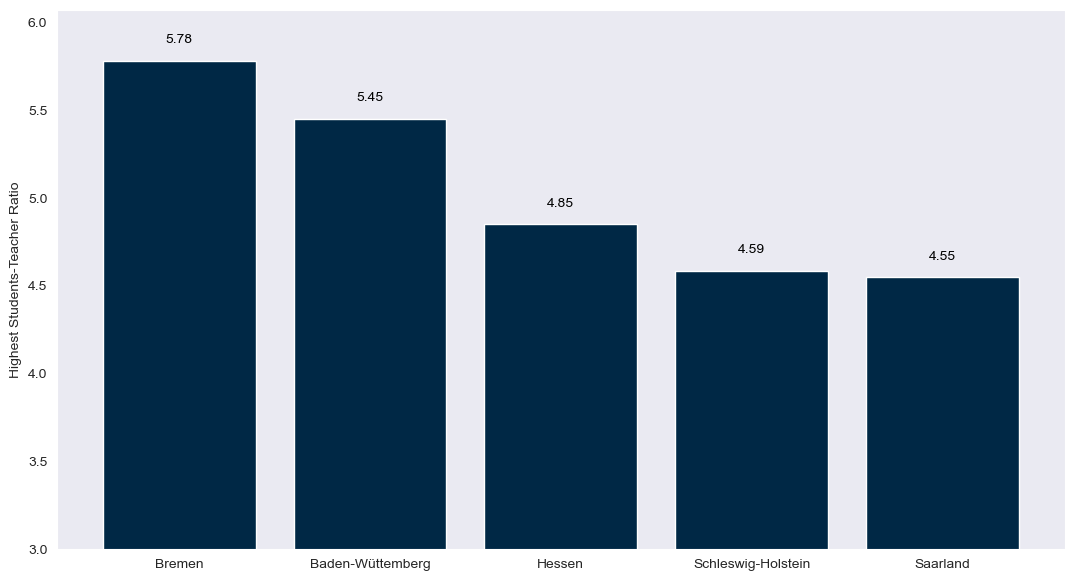

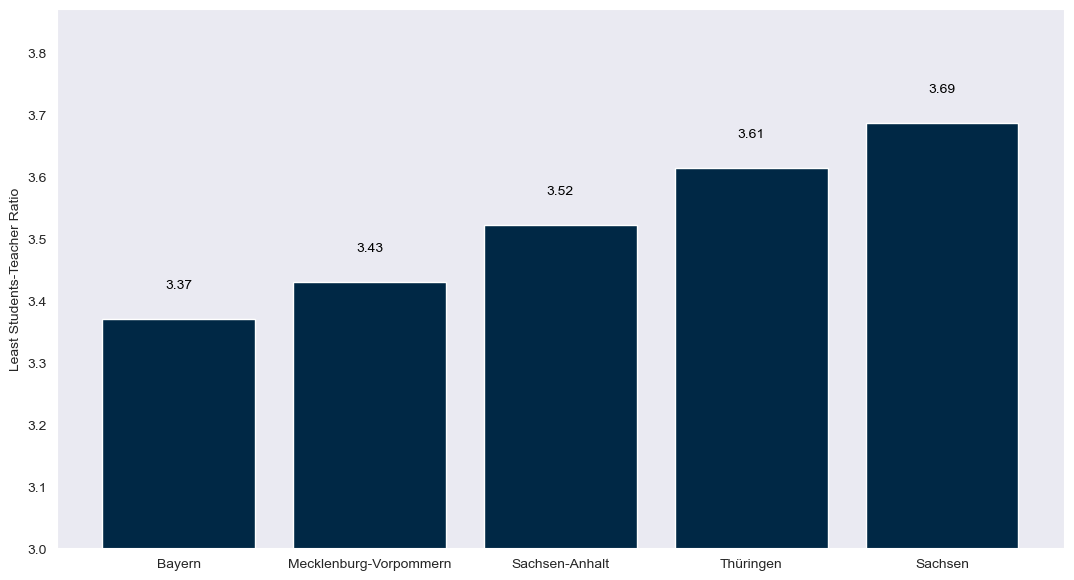

In [115]:
# Sort the states based on average Pass Rate
top_states_highest = avg_special_hours_student.sort_values('avg_special_hours_student', ascending=False).head(5)
top_states_lowest = avg_special_hours_student.sort_values('avg_special_hours_student', ascending=True).head(5)

plt.figure(figsize=(13, 7))
#plt.rcParams.update({'font.size': 14})
# Create a bar chart for top 3 states with highest Pass Rate
plt.bar(top_states_highest['Federal States'], top_states_highest['avg_special_hours_student'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Highest Students-Teacher Ratio')
#plt.title('Top 5 States with Highest Passing Rate in the Last Decade')
plt.ylim(bottom=3)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_highest['avg_special_hours_student']):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', color='black')
plt.show()



plt.figure(figsize=(13, 7))
# Create a bar chart for top 3 states with lowest Pass Rate
plt.bar(top_states_lowest['Federal States'], top_states_lowest['avg_special_hours_student'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Least Students-Teacher Ratio')
#plt.title('Top 5 States with Highest Failing Rate in the Last Decade')
plt.ylim(bottom=3)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_lowest['avg_special_hours_student']):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', color='black')

plt.show()

In [116]:
# Filter by school types
school_type = ['Allgemeinbildende Schulen']
hours_per_student = hours_per_student_concat[hours_per_student_concat['SchoolType'].isin(school_type)]
hours_per_student.drop(columns={'Deutschland'}, inplace=True)

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_68856/2814714317.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
avg_student_hours = hours_per_student.groupby('Year').sum().mean().reset_index()
avg_student_hours.rename(columns={'index':'Federal States',
                                        0: 'avg_student_hours'}, inplace=True)
avg_student_hours

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_68856/2988016197.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Federal States,avg_student_hours
0,Baden-Wüttemberg,1.775810
1,Bayern,1.640220
2,Berlin,1.785265
3,Brandenburg,1.737483
4,Bremen,1.772158
5,Hamburg,1.770412
6,Hessen,1.714893
7,Mecklenburg-Vorpommern,1.765830
8,Niedersachsen,1.685601
9,Nordrhein-Westfalen,1.603504


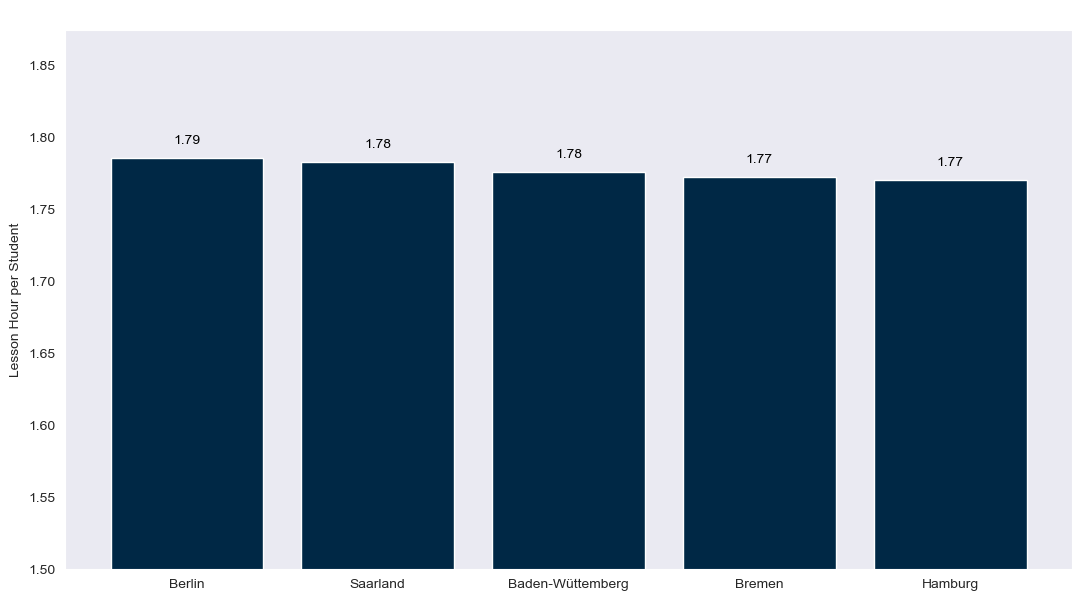

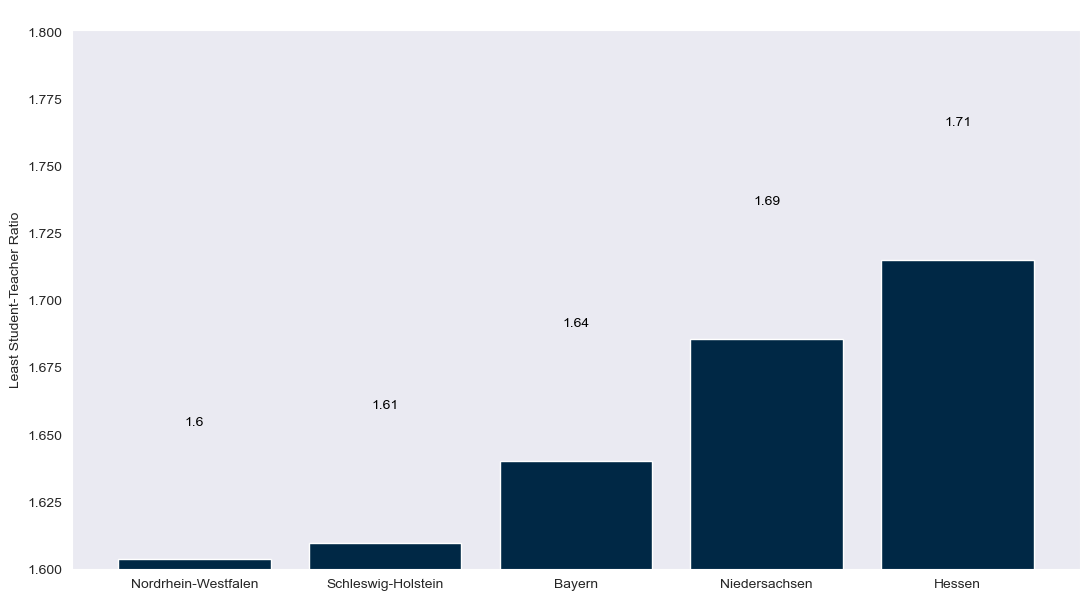

In [118]:
top_states_highest = avg_student_hours.sort_values('avg_student_hours', ascending=False).head(5)
top_states_lowest = avg_student_hours.sort_values('avg_student_hours', ascending=True).head(5)

plt.figure(figsize=(13, 7))
#plt.rcParams.update({'font.size': 14})
plt.bar(top_states_highest['Federal States'], top_states_highest['avg_student_hours'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Lesson Hour per Student')
plt.title(' ')
plt.ylim(bottom=1.5)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_highest['avg_student_hours']):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', color='black')
plt.show()



plt.figure(figsize=(13, 7))
plt.bar(top_states_lowest['Federal States'], top_states_lowest['avg_student_hours'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Least Student-Teacher Ratio')
plt.title(' ')
plt.ylim(bottom=1.6)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_lowest['avg_student_hours']):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', color='black')

plt.show()

### Hypothese 2
- #### Students in states with longer hours of lesson may experience higher exam passing rate and lower dropouts

In [ ]:
avg_key_indicator = pd

Text(0.5, 1.0, 'Correlation between pass rate and lesson hours')

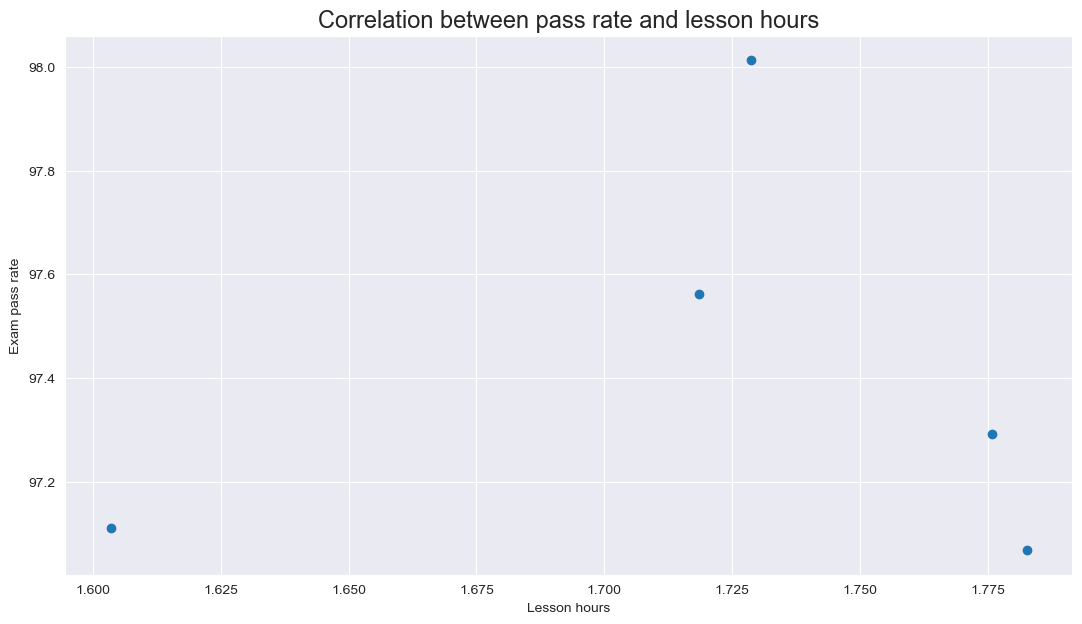

In [124]:
plt.figure(figsize=(13, 7))
plt.scatter(data = hypothese2, x = "avg_student_hours", y = "Pass Rate")
plt.xlabel('Lesson hours')
plt.ylabel('Exam pass rate')
plt.title('Correlation between pass rate and lesson hours', fontsize=17)

<Figure size 1300x700 with 0 Axes>

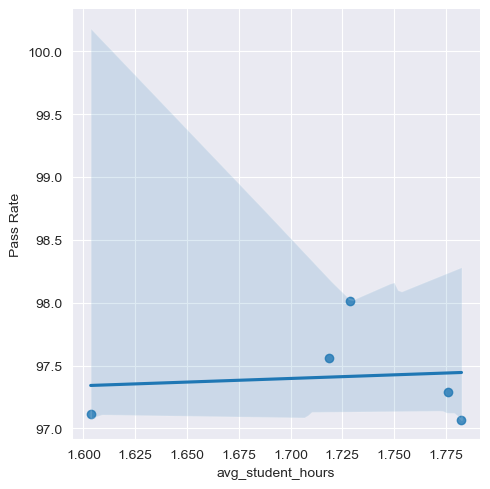

In [125]:
plt.figure(figsize=(13, 7))
sns.lmplot(data=hypothese2, x="avg_student_hours", y="Pass Rate")
plt.grid(True)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)

In [126]:
hypothese2_ploty = hypothese2
hypothese2_ploty.rename(columns={'Federal States':'federal_states'}, inplace=True)
hypothese2_ploty

,federal_states,Pass Rate,avg_student_hours
15,Thüringen,98.012456,1.728603
10,Rheinland-Pfalz,97.562533,1.718584
0,Baden-Wüttemberg,97.293379,1.775810
9,Nordrhein-Westfalen,97.111472,1.603504
11,Saarland,97.068640,1.782509


In [127]:
fig = px.scatter(hypothese2_ploty, x='Pass Rate', y='avg_student_hours', color="federal_states", trendline='ols')
fig.show()

                          avg_dropouts_rate  exam pass Rate  \
avg_dropouts_rate                  1.000000       -0.519381   
exam pass Rate                    -0.519381        1.000000   
avg_student_lesson_hours           0.251228       -0.238441   

                          avg_student_lesson_hours  
avg_dropouts_rate                         0.251228  
exam pass Rate                           -0.238441  
avg_student_lesson_hours                  1.000000  


/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_68856/1883645876.py:25: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



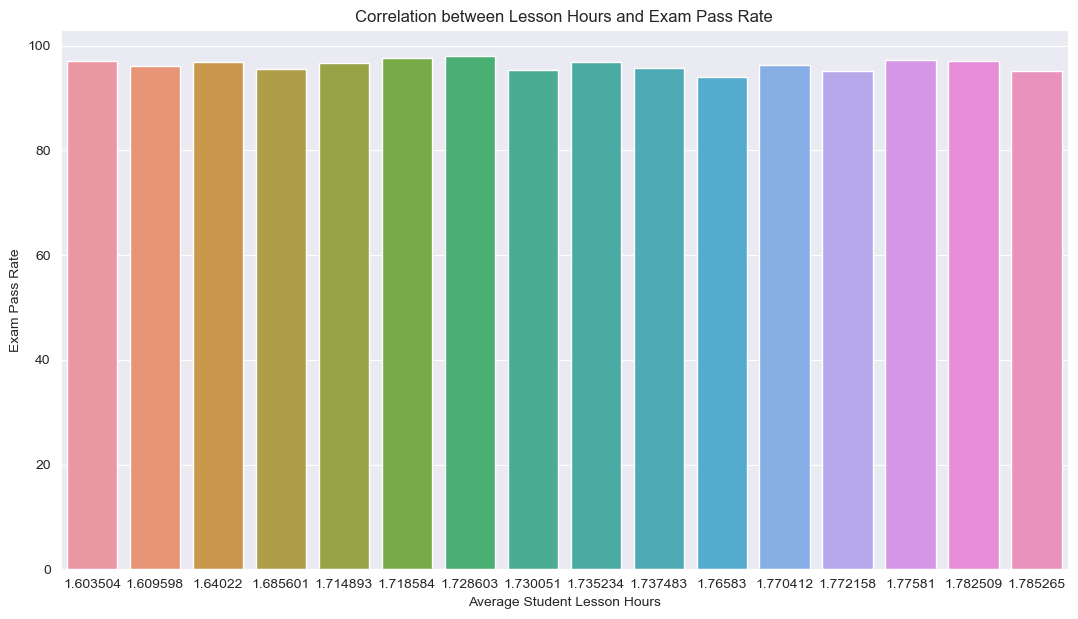

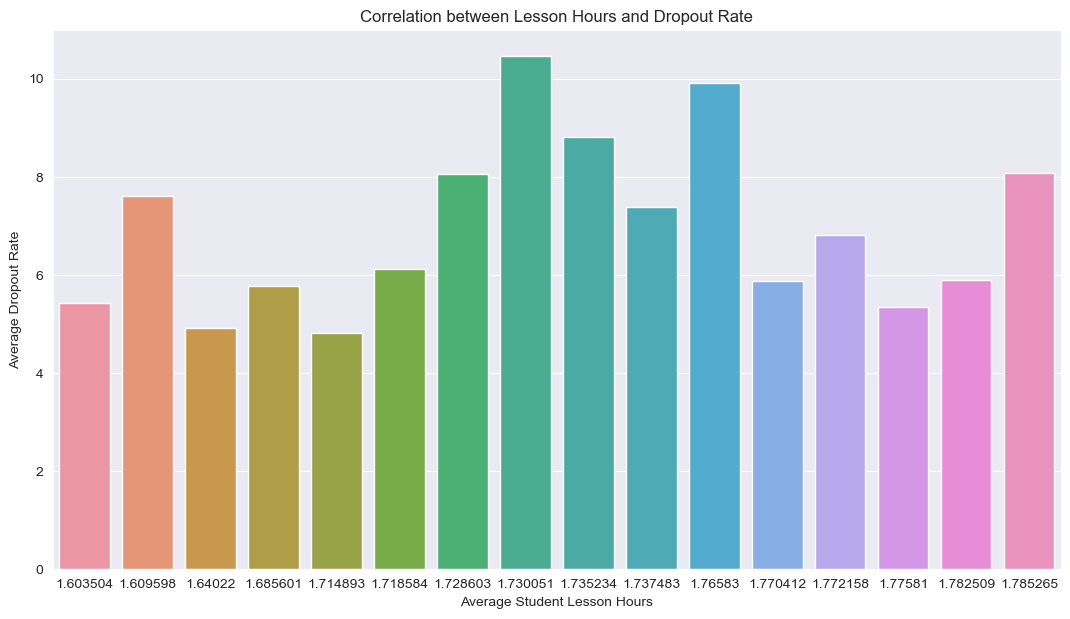

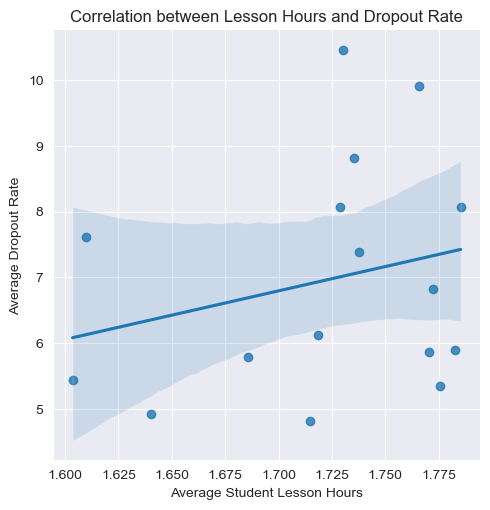

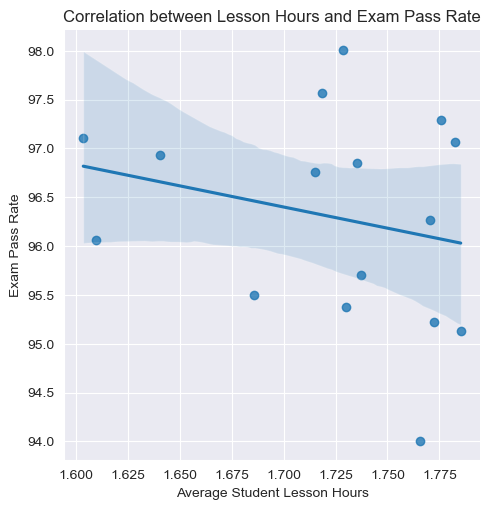

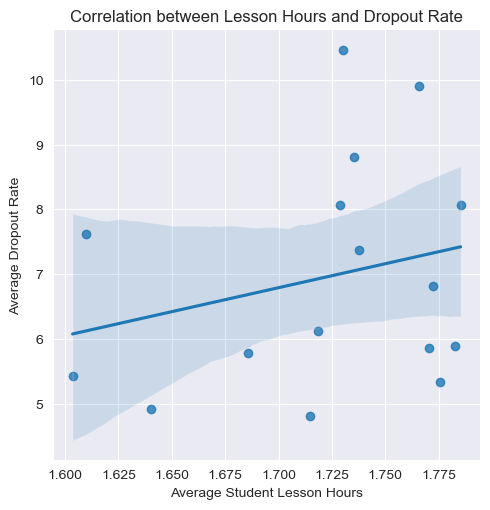

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# create the dataframe
df = pd.DataFrame({
    'Federal States': ['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
                       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
                       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
                       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'],
    'avg_dropouts_rate': [5.343987, 4.916763, 8.069948, 7.380596, 6.813686, 5.868394, 
                          4.81745, 9.905997, 5.7848, 5.436519, 6.122299, 5.897445,
                          8.810749, 10.465883, 7.617255, 8.067703],
    'exam pass Rate': [97.293379, 96.932067, 95.13188, 95.70532, 95.219964, 96.262581, 
                       96.762476, 94.006275, 95.494601, 97.111472, 97.562533, 97.06864,
                       96.851892, 95.380249, 96.063307, 98.012456],
    'avg_student_lesson_hours': [1.77581, 1.64022, 1.785265, 1.737483, 1.772158, 
                                 1.770412, 1.714893, 1.76583, 1.685601, 1.603504, 
                                 1.718584, 1.782509, 1.735234, 1.730051, 1.609598, 
                                 1.728603]
})

# calculate the correlation coefficients
corr = df.corr(method='pearson')
print(corr)


# plot the data
plt.figure(figsize=(13, 7))
sns.set_style('darkgrid')
sns.barplot(x='avg_student_lesson_hours', y='exam pass Rate', data=df)
#sns.lmplot(x='avg_student_lesson_hours', y='exam pass Rate', data=df)
plt.xlabel('Average Student Lesson Hours')
plt.ylabel('Exam Pass Rate')
plt.title('Correlation between Lesson Hours and Exam Pass Rate')
plt.show()

plt.figure(figsize=(13, 7))
sns.barplot(x='avg_student_lesson_hours', y='avg_dropouts_rate', data=df)
plt.xlabel('Average Student Lesson Hours')
plt.ylabel('Average Dropout Rate')
plt.title('Correlation between Lesson Hours and Dropout Rate')
plt.show()

# Scatterplot with trend line
sns.lmplot(x='avg_student_lesson_hours', y='avg_dropouts_rate', data=df)
plt.xlabel('Average Student Lesson Hours')
plt.ylabel('Average Dropout Rate')
plt.title('Correlation between Lesson Hours and Dropout Rate')
plt.show()

# plot the data with trend lines
sns.set_style('darkgrid')
sns.lmplot(x='avg_student_lesson_hours', y='exam pass Rate', data=df)
plt.xlabel('Average Student Lesson Hours')
plt.ylabel('Exam Pass Rate')
plt.title('Correlation between Lesson Hours and Exam Pass Rate')
plt.show()

sns.lmplot(x='avg_student_lesson_hours', y='avg_dropouts_rate', data=df)
plt.xlabel('Average Student Lesson Hours')
plt.ylabel('Average Dropout Rate')
plt.title('Correlation between Lesson Hours and Dropout Rate')
plt.show()

import plotly.express as px

fig1 = px.scatter(df, x='avg_student_lesson_hours', y='exam pass Rate', trendline='ols')
fig1.update_layout(title='Correlation between Lesson Hours and Exam Pass Rate', xaxis_title='Average Student Lesson Hours', yaxis_title='Exam Pass Rate')

fig2 = px.scatter(df, x='avg_student_lesson_hours', y='avg_dropouts_rate', trendline='ols')
fig2.update_layout(title='Correlation between Lesson Hours and Dropout Rate', xaxis_title='Average Student Lesson Hours', yaxis_title='Average Dropout Rate')

fig1.show()
fig2.show()



In [129]:
corr = df.corr(method='pearson')
corr

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_68856/1487081547.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,avg_dropouts_rate,exam pass Rate,avg_student_lesson_hours
avg_dropouts_rate,1.000000,-0.519381,0.251228
exam pass Rate,-0.519381,1.000000,-0.238441
avg_student_lesson_hours,0.251228,-0.238441,1.000000


/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_68856/4014866372.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

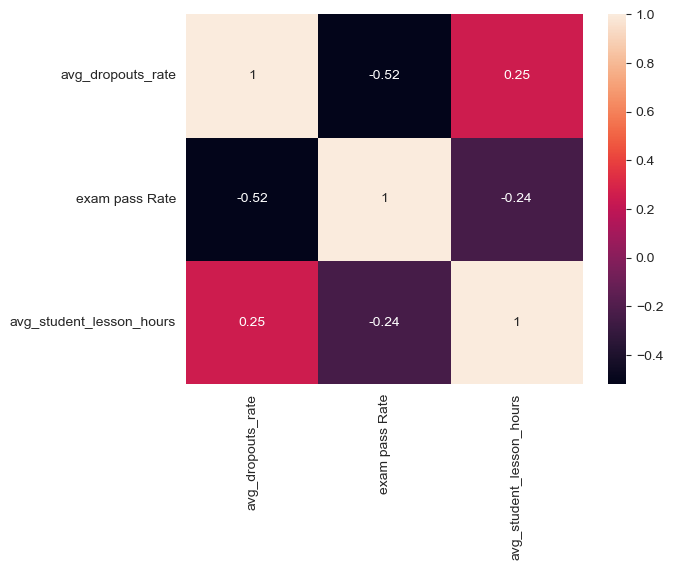

In [130]:
sns.heatmap(df.corr(), annot= True)